# GeoPandas

- skip_exec: true


In [ ]:
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", None)

plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0

PROJECT_ROOT = Path.cwd().parent.parent

In [ ]:
lands_data = gpd.read_file(f"{PROJECT_ROOT}/data/kaggle_geospatial/DEC_lands/DEC_lands/DEC_lands.shp")

POI_data = gpd.read_file(
    f"{PROJECT_ROOT}/data/kaggle_geospatial/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp"
)

roads_trails = gpd.read_file(
    f"{PROJECT_ROOT}/data/kaggle_geospatial/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp"
)

counties = gpd.read_file(
    f"{PROJECT_ROOT}/data/kaggle_geospatial/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp"
)


Every GeoDataFrame contains a special `geometry` column.

While this column can contain a variety of different datatypes, each entry will typically be a Point, LineString, or Polygon. These three types of geometric objects have built-in attributes that you can use to quickly analyze the dataset.

For instance, you can get the x- and y-coordinates of a Point from the x and y attributes, respectively.


In [ ]:
POI_data["geometry"]


0       POINT (505138.696 4649388.247)
1       POINT (333481.874 4692737.800)
2       POINT (525210.784 4833837.295)
3       POINT (231909.125 4712818.500)
4       POINT (193656.734 4679632.500)
                     ...              
4312    POINT (549184.220 4898291.000)
4313    POINT (492699.219 4828844.500)
4314    POINT (559949.450 4901744.055)
4315    POINT (561221.432 4938687.082)
4316    POINT (527492.411 4836534.303)
Name: geometry, Length: 4317, dtype: geometry

In [ ]:
POI_data["geometry"].x

0       505138.696169
1       333481.873865
2       525210.783740
3       231909.124843
4       193656.734407
            ...      
4312    549184.220178
4313    492699.218654
4314    559949.450268
4315    561221.432349
4316    527492.410878
Length: 4317, dtype: float64

And, you can get the length of a LineString from the length attribute.


In [ ]:
roads_trails["geometry"]


0       LINESTRING (511367.312 4804744.000, 511442.406...
1       LINESTRING (512806.962 4804560.806, 512796.625...
2       MULTILINESTRING ((515866.032 4804650.001, 5158...
3       LINESTRING (533975.501 4796126.500, 533992.812...
4       LINESTRING (531496.700 4799892.919, 531482.375...
                              ...                        
8137    LINESTRING (450418.188 4713637.500, 450404.188...
8138    LINESTRING (208326.645 4690982.422, 208300.693...
8139    LINESTRING (478940.856 4841512.499, 478899.532...
8140    LINESTRING (444809.601 4714511.923, 444791.940...
8141    LINESTRING (540828.622 4840053.093, 540833.660...
Name: geometry, Length: 8142, dtype: geometry

In [ ]:
roads_trails["geometry"].length

0        1577.112643
1         945.366235
2        3853.119292
3       10485.458536
4        1432.490031
            ...     
8137     6321.863380
8138      778.499273
8139     4285.822321
8140     5395.937432
8141      342.000448
Length: 8142, dtype: float64

Or, you can get the area of a Polygon from the area attribute.


In [ ]:
lands_data["geometry"]

0       POLYGON ((486093.245 4635308.586, 486787.235 4...
1       POLYGON ((491931.514 4637416.256, 491305.424 4...
2       POLYGON ((486000.287 4635834.453, 485007.550 4...
3       POLYGON ((541716.775 4675243.268, 541217.579 4...
4       POLYGON ((583896.043 4909643.187, 583891.200 4...
                              ...                        
2978    POLYGON ((476797.577 4963760.373, 476813.252 4...
2979    POLYGON ((474212.474 4961236.101, 474189.987 4...
2980    POLYGON ((340844.385 4757499.092, 341048.855 4...
2981    POLYGON ((553048.551 4715991.593, 553061.611 4...
2982    POLYGON ((495150.066 4871132.485, 495156.318 4...
Name: geometry, Length: 2983, dtype: geometry

In [ ]:
lands_data["geometry"].area

0       2.990365e+06
1       1.143940e+06
2       9.485476e+05
3       1.822293e+06
4       2.821959e+05
            ...     
2978    7.741717e+04
2979    7.145329e+03
2980    3.879159e+05
2981    5.606785e+05
2982    7.068012e+04
Length: 2983, dtype: float64

The geometry data can be displayed by calling the plot method displayed when we call the `plot()` method.


In [ ]:
wild_lands = lands_data.loc[lands_data["CLASS"].isin(["WILD FOREST", "WILDERNESS"])].copy()
campsites = POI_data.loc[POI_data["ASSET"] == "PRIMITIVE CAMPSITE"].copy()
trails = roads_trails.loc[roads_trails["ASSET"] == "FOOT TRAIL"].copy()


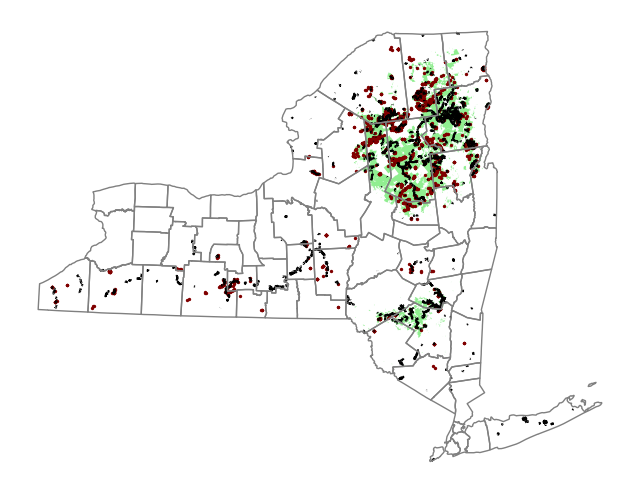

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
counties.plot(color="none", edgecolor="grey", zorder=3, ax=ax, label="County")
wild_lands.plot(color="lightgreen", ax=ax, label="Wild lands")
campsites.plot(color="maroon", markersize=2, ax=ax, label="Campsites")
trails.plot(color="black", markersize=1, ax=ax, label="Trails")
ax.set_axis_off()
plt.show()

Geopandas comes with certain datasets builtin. For instance we can pull up a world map which may be useful as a background for plotting global data.


In [ ]:
world_filepath = gpd.datasets.get_path("naturalearth_lowres")
world = gpd.read_file(world_filepath)
world


/var/folders/qz/3pl78vgn6t7cltx35ttht03r0000gn/T/ipykernel_22922/3929154988.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path("naturalearth_lowres")


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


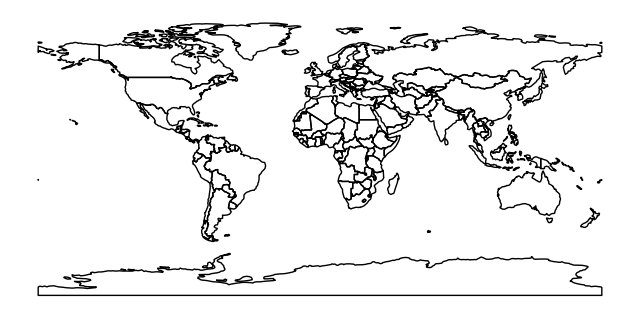

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
world.plot(color="none", ax=ax)
ax.set_axis_off()
plt.show()

## Coordinate Systems


Map projections are the ways the 3D world can be represented on a 2D surface. They can't be 100% accurate. Each projection distorts the surface of the Earth in some way, while retaining some useful property. For instance:

- The equal-area projections (like "Lambert Cylindrical Equal Area", or "Africa Albers Equal Area Conic") preserve area. This is a good choice, if you'd like to calculate the area of a country or city, for example.
- The equidistant projections (like "Azimuthal Equidistant projection") preserve distance. This would be a good choice for calculating flight distance.

We use a coordinate reference system (CRS) to show how the projected points correspond to real locations on Earth.

When we create a GeoDataFrame from a shapefile, the CRS is already imported for us:


In [ ]:
world.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
regions = gpd.read_file(f"{PROJECT_ROOT}/data/kaggle_geospatial/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")

In [ ]:
regions


,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."
5,Northern,"POLYGON ((818287.468 1185632.455, 818268.664 1..."
6,Upper East,"POLYGON ((811994.328 1230449.528, 812004.699 1..."
7,Upper West,"POLYGON ((658854.315 1220818.656, 659057.210 1..."
8,Volta,"POLYGON ((899718.788 875120.098, 899564.444 87..."
9,Western,"POLYGON ((490349.315 771271.143, 490530.091 77..."


In [ ]:
regions.crs


<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Coordinate reference systems are referenced by European Petroleum Survey Group (EPSG) codes.

The `regions` GeoDataFrame uses `EPSG 32630`, which is more commonly called the "Mercator" projection. This projection preserves angles (making it useful for sea navigation) and slightly distorts area.

However, when creating a GeoDataFrame from a CSV file, we have to set the CRS. EPSG 4326 corresponds to coordinates in latitude and longitude.


In [ ]:
facilities_df = pd.read_csv(f"{PROJECT_ROOT}/data/kaggle_geospatial/ghana/ghana/health_facilities.csv")

facilities = gpd.GeoDataFrame(
    facilities_df,
    geometry=gpd.points_from_xy(
        facilities_df["Longitude"],
        facilities_df["Latitude"],
    ),
    crs="EPSG:4326",
)

facilities

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
...,...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,Ackaakrom CHPS,CHPS,Ackaakrom,Government,NaN,NaN,POINT EMPTY
3752,Western,Sefwi-Akontombra,Apprutu CHPS,CHPS,Apprutu,Government,NaN,NaN,POINT EMPTY
3753,Western,Sefwi-Akontombra,Kojokrom CHPS,CHPS,Kojokrom,Government,NaN,NaN,POINT EMPTY
3754,Western,Sefwi-Akontombra,Yawkrom CHPS,CHPS,Yawkrom,Government,NaN,NaN,POINT EMPTY


Re-projecting refers to the process of changing the CRS. This is done in GeoPandas with the `to_crs()` method. When plotting multiple GeoDataFrames, it's important that they all use the same CRS. In the code cell below, we change the CRS of the facilities GeoDataFrame to match the CRS of regions before plotting it. The `to_crs()`` method modifies only the "geometry" column: all other columns are left as-is.


In [ ]:
facilities.to_crs(epsg=32630)

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
...,...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,Ackaakrom CHPS,CHPS,Ackaakrom,Government,NaN,NaN,POINT EMPTY
3752,Western,Sefwi-Akontombra,Apprutu CHPS,CHPS,Apprutu,Government,NaN,NaN,POINT EMPTY
3753,Western,Sefwi-Akontombra,Kojokrom CHPS,CHPS,Kojokrom,Government,NaN,NaN,POINT EMPTY
3754,Western,Sefwi-Akontombra,Yawkrom CHPS,CHPS,Yawkrom,Government,NaN,NaN,POINT EMPTY


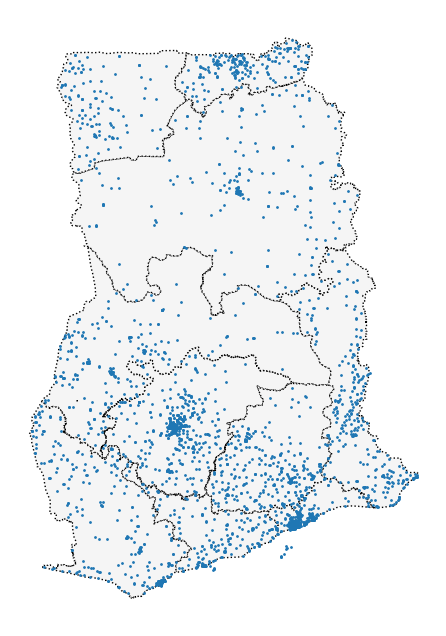

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
regions.plot(figsize=(8, 8), color="whitesmoke", linestyle=":", edgecolor="black", ax=ax)
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)
ax.set_axis_off()
plt.show()


In case the EPSG code is not available in GeoPandas, we can change the CRS with what's known as the "proj4 string" of the CRS. For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:


In [ ]:
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."
5,Northern,"POLYGON ((-0.09041 10.71194, -0.09061 10.70918..."
6,Upper East,"POLYGON ((-0.14402 11.11730, -0.14393 11.11679..."
7,Upper West,"POLYGON ((-1.54582 11.04027, -1.54411 11.01019..."
8,Volta,"POLYGON ((0.62403 7.90125, 0.62264 7.90174, 0...."
9,Western,"POLYGON ((-3.08737 6.97758, -3.08573 6.97675, ..."


In [ ]:
regions.loc[:, "area"] = regions["geometry"].area / 10**6

print(f"Area of Ghana: {regions['area'].sum()} square kilometers")
print("CRS:", regions.crs)
regions


Area of Ghana: 239584.5760055668 square kilometers
CRS: EPSG:32630


,Region,geometry,area
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
5,Northern,"POLYGON ((818287.468 1185632.455, 818268.664 1...",69830.576358
6,Upper East,"POLYGON ((811994.328 1230449.528, 812004.699 1...",8629.357677
7,Upper West,"POLYGON ((658854.315 1220818.656, 659057.210 1...",19022.080963
8,Volta,"POLYGON ((899718.788 875120.098, 899564.444 87...",20948.296066
9,Western,"POLYGON ((490349.315 771271.143, 490530.091 77...",24317.315180


In the code cell above, since the CRS of the regions GeoDataFrame is set to EPSG 32630 (a "Mercator" projection), the area calculation is slightly less accurate than if we had used an equal-area projection like "Africa Albers Equal Area Conic". But this still yields the area of Ghana as approximately 239585 square kilometers, which is not too far off from the correct answer.


## Interactive Maps
